# Antimony Model Creation Pipeline

In [1]:
import antimony 

ant_model_1 = """
model NFB

    v1: S1 -> pS1; k1*S1*K1^n1/(K1^n1+pS3^n1);
    v2: pS1 -> S1; k2*pS1;
    v3: S2 -> pS2; k3*S2*pS1;
    v4: pS2 -> S2; k4*pS2;
    v5: S3 -> pS3; k5*S3*pS2;
    v6: pS3 -> S3; k6*S3;

    S1=0
    S2=0
    S3=0

    S1t = 50 
    S2t = 50 
    S3t = 50 

    k1 = 0.001
    k2 = 0.01
    k3 = 0.001
    k4 = 0.01
    k5 = 0.001
    k6 = 0.01
    n1=3
    K1=10
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model_1)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print(sbml_model)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.13.2 with libSBML version 5.19.5. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model metaid="NFB" id="NFB">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pS1" compartment="default_compartment" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pS3" compartment="default_compartment" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
   

## The negative feedback Goodwin system 

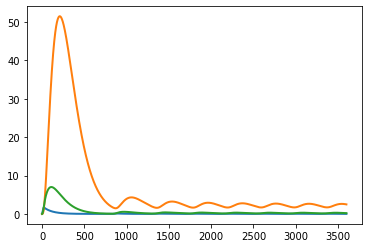

In [9]:
import antimony 

# Example 1 - The Goodwin System 

ant_model = """
model NFB

    React1:    -> S1; k1*K1^n1/(K1^n1+S3^n1);
    React2: S1 ->   ; kd1*S1;
    React3:    -> S2; k2*S1;
    React4: S2 ->   ; kd2*S2;
    React5:    -> S3; k3*S2;
    React6: S3 ->   ; kd3*S3;

    

    S1=0
    S2=0
    S3=0

    k1=0.1
    k2=0.1
    k3=0.1
    kd1=0.01
    kd2=0.01
    kd3=0.01
    n1=9
    K1=1
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    # print(sbml_model)

    # with open('output_sbml.xml', 'w') as f:
    #     f.write(sbml_model)
import tellurium as te

rr = te.loada(ant_model)

rr.integrator = 'cvode'
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-3
rr.integrator.initial_time_step = 0.00001

result = rr.simulate(0, 3600, 3600) 


te.plotArray(result)
# print(rr.steadyStateSolvers)
# print(rr.integrators)

## Replicate 

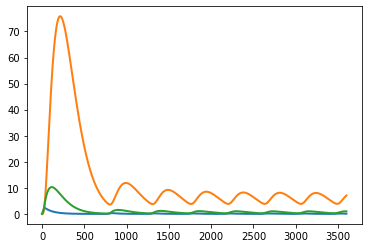

In [16]:
import antimony 

# Example 1 - The Goodwin System 

ant_model = """
model oscli
  #Reactions:
  J0:    -> S1;  k1 * K0^n / (K0^n + S3^n);
  J1: S1 ->   ;  kd1 * S1; 
  J2:    -> S2;  k2 * S1;
  J3: S2 ->   ;  kd2 * S2; 
  J5:    -> S3;  k3 * S2;
  J6: S3 ->   ;  kd3 * S3; 

  # Species initializations:
  S1 = 0
  S2 = 0
  S3 = 0

  # Variable initializations:
  k1 = 0.1
  k2 = 0.1
  k3 = 0.1
  kd1 = 0.01
  kd2 = 0.01
  kd3 = 0.01
  n = 12
  K0 = 3
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    # print(sbml_model)

    # with open('output_sbml.xml', 'w') as f:
    #     f.write(sbml_model)
import tellurium as te

rr = te.loada(ant_model)

rr.integrator = 'cvode'
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-3
rr.integrator.initial_time_step = 0.00001

result = rr.simulate(0, 3600, 3600) 


te.plotArray(result)
# print(rr.steadyStateSolvers)
# print(rr.integrators)

## Testing Tellurium

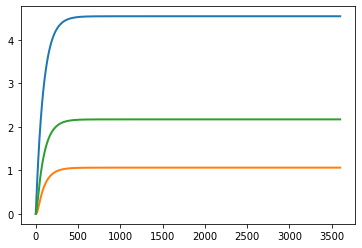

In [163]:
import tellurium as te

rr = te.loada('''
    model example0
      React1:  -> pS1; k1*(S1t-pS1)*((K1^n1)/(K1^n1 + pS3^n1));
      React2: pS1  -> ; k2*pS1;
      React3:  -> pS2; k3*(S2t-pS2)*pS1;
      React4: pS2  -> ; k4*pS2;
      React5: -> pS3; k5*(S3t-pS3)*pS2;
      React6: pS3 ->; k6*pS3;

      pS1=0
      pS2=0
      pS3=0

      S1t=50
      S2t=50
      S3t=50
      k1=0.001
      k2=0.01
      k3=0.001
      k4=0.1
      k5=0.001
      k6=0.1
      n1=3
      K1=10
    end
''')

result = rr.simulate(0, 3600, 500) 
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-3
rr.integrator.initial_time_step = 0.00001


te.plotArray(result)

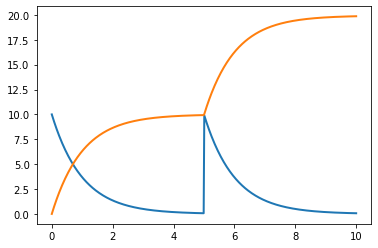

In [165]:
import tellurium as te

rr = te.loada('''
model test # name the model
  compartment C1; # specify compartments
  C1 = 1.0; # assign compartment volume
  species S1, S2;
  S1 = 10.0; # assign species initial conditions
  S2 = 0.0;
  S1 in C1; S2 in C1; # allocate species to appropriate compartment
  J1: S1 -> S2; k1*S1; # reaction; reaction rate law;
  k1 = 1.0; # assign constant values to global parameters
  E1: at (time > 5): S1 = 10; # add an event - spike in S1
end
''')

result = rr.simulate(0, 10, 500) 
te.plotArray(result)

## The negative feedback signalling cascade 

In [268]:
import antimony 

# Example 2 - The Negative feedback phosphorylation cascade

ant_model_2 = """
model MAPK

    v1: S1 -> pS1; k1*S1*K1^n1/(K1^n1+pS3^n1);
    v2: pS1 -> S1; k2*pS1;
    v3: S2 -> pS2; k3*S2*pS1;
    v4: pS2 -> S2; k4*pS2;
    v5: S3 -> pS3; k5*S3*pS2;
    v6: pS3 -> S3; k6*pS3;

    S1=100
    S2=100
    S3=100
    pS1=0
    pS2=0
    pS3=0

    S1t = 100
    S2t = 100
    S3t = 100

    k1=0.05
    k2=1
    k3=0.05
    k4=1
    k5=0.05
    k6=1
    n1=12
    K1=10
end
"""

'''
Found paramset which produce oscillation 
'''

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model_2)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    # print(sbml_model)

    with open('mapk.xml', 'w') as f:
        f.write(sbml_model)
else:
    print('Model compilation error')

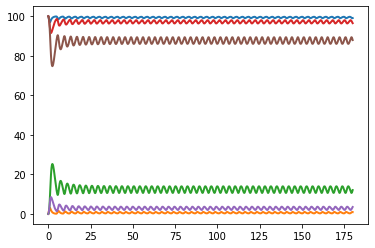

In [270]:
import tellurium as te

rr = te.loada(ant_model_2)

# rr.integrator = 'rk45'
# rr.integrator.absolute_tolerance = 5e-10
# rr.integrator.relative_tolerance = 1e-3
# rr.integrator.initial_time_step = 0.00001

result = rr.simulate(0, 180, 1800) 


te.plotArray(result)

## The mixed feedback signalling cascade 

In [2]:
# Mixed feedback signalling cascade 

import antimony 

# Example 2 - The Negative feedback phosphorylation cascade

ant_model_3 = """
model Mixed

    v1: S1 -> pS1; k1*S1*K1^n1/(K1^n1+pS3^n1);
    v2: pS1 -> S1; k2*pS1;
    v3: S2 -> pS2; k3*S2*pS1*(1+(alpha*pS3^n2/(K2^n2+pS3^n2)));
    v4: pS2 -> S2; k4*pS2;
    v5: S3 -> pS3; k5*S3*pS2;
    v6: pS3 -> S3; k6*pS3;

    S1=100
    S2=100
    S3=100
    pS1=0
    pS2=0
    pS3=0

    S1t = 100
    S2t = 100 
    S3t = 100

    k1 = 0.1
    k2 = 0.01
    k3 = 0.01
    k4 = 0.01
    k5 = 0.01
    k6 = 0.01
    n1=10
    K1=1
    alpha=10
    n2=15
    K2=8 
end
"""

'''
Found paramset which produce oscillation 
'''

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model_3)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    # print(sbml_model)

    with open('mixed.xml', 'w') as f:
        f.write(sbml_model)
else:
    print('Model compilation error')

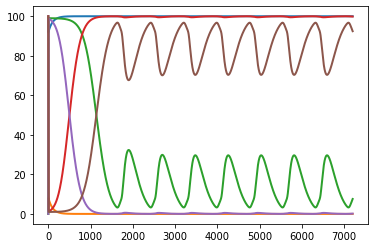

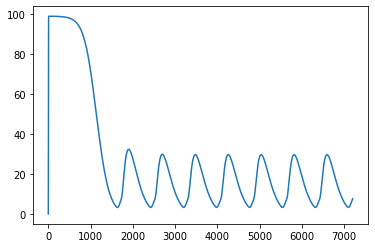

In [3]:
import tellurium as te
import matplotlib.pyplot as plt 

rr = te.loada(ant_model_3)

# rr.integrator = 'rk45'
# rr.integrator.absolute_tolerance = 5e-20
rr.integrator.relative_tolerance = 1e-10
# rr.integrator.initial_time_step = 0.00001
# rr.integrator.nonnegative = 'true'

result = rr.simulate(0, 7200, 7200) 

# print(result["[S1]"])

te.plotArray(result)

plt.plot(result["[pS3]"])